In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
df = pd.read_csv("C://Users//amitk//Desktop//ML Challenge//dataset//Housing.csv")

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
df.shape

(545, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [51]:
X = df.drop(columns=['price'])
y= df['price']

In [53]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [57]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols)
    
])

In [61]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])

In [73]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [83]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('model', LinearRegression())])

In [77]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (408, 12)
Shape of y_train: (408,)


In [85]:
y_pred = pipeline.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, y_pred)
print("MSE",mse)

MSE 1552389233075.0461


In [97]:
# Example input for prediction
new_data = pd.DataFrame({
    'area': [1000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['no'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [8],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
})

# Predict price
predicted_price = pipeline.predict(new_data)
print("Predicted Price:", predicted_price)


Predicted Price: [7203515.47187067]


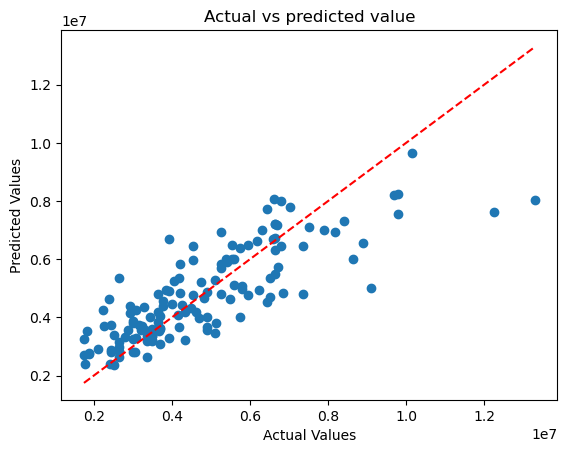

In [103]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs predicted value')

min_val = min(min(y_test),min(y_pred))
max_val = max(max(y_test),max(y_pred))
plt.plot([min_val, max_val],[min_val, max_val], color='red',linestyle='--')

plt.show()